<a href="https://colab.research.google.com/github/Snehaannazac/colab-git-demo-sanna/blob/main/Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Choosing a dataset



In [1]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 34s 0us/step


#Resize images

In [2]:
from tensorflow.image import resize
import numpy as np

# Example: resize all images to 32x32
X_train_resized = np.array([resize(img, (32, 32)).numpy() for img in X_train])
X_test_resized = np.array([resize(img, (32, 32)).numpy() for img in X_test])


#Normalize pixel values

In [3]:
X_train_resized = X_train_resized / 255.0
X_test_resized = X_test_resized / 255.0


#Flatten images for Random Forest

In [4]:
X_train_flat = X_train_resized.reshape(len(X_train_resized), -1)
X_test_flat = X_test_resized.reshape(len(X_test_resized), -1)


#Encode labels

In [5]:
y_train = y_train.flatten()
y_test = y_test.flatten()


#Define parameter grid

In [6]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


#Create Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2
)


#Fit the model

In [9]:
n_train = 2000
n_test = 500

X_train_flat_small = X_train_flat[:n_train]
y_train_small = y_train[:n_train]

X_test_flat_small = X_test_flat[:n_test]
y_test_small = y_test[:n_test]


In [10]:
grid_search.fit(X_train_flat_small, y_train_small)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   3.0s
[CV] END max_depth=10, min_samples_l

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

#Print best parameters and estimator

In [11]:
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


#Predictions

In [12]:
y_pred = best_rf.predict(X_test_flat)


#Metrics

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.3657
Precision: 0.36165517167382794
Recall: 0.3657
F1-Score: 0.35907347122002575


#Confusion Matrix

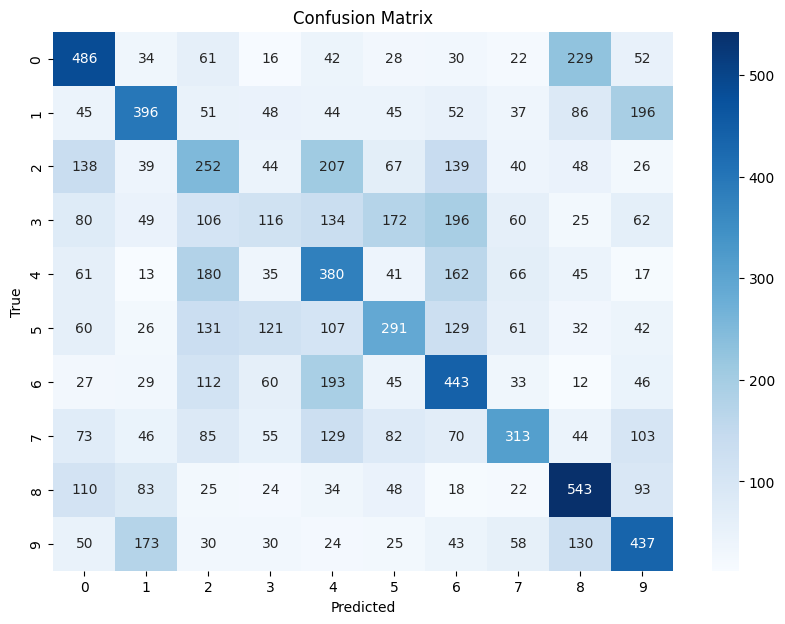

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#Classification Report

In [15]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.43      0.49      0.46      1000
           1       0.45      0.40      0.42      1000
           2       0.24      0.25      0.25      1000
           3       0.21      0.12      0.15      1000
           4       0.29      0.38      0.33      1000
           5       0.34      0.29      0.32      1000
           6       0.35      0.44      0.39      1000
           7       0.44      0.31      0.37      1000
           8       0.45      0.54      0.49      1000
           9       0.41      0.44      0.42      1000

    accuracy                           0.37     10000
   macro avg       0.36      0.37      0.36     10000
weighted avg       0.36      0.37      0.36     10000



#Plot feature importances

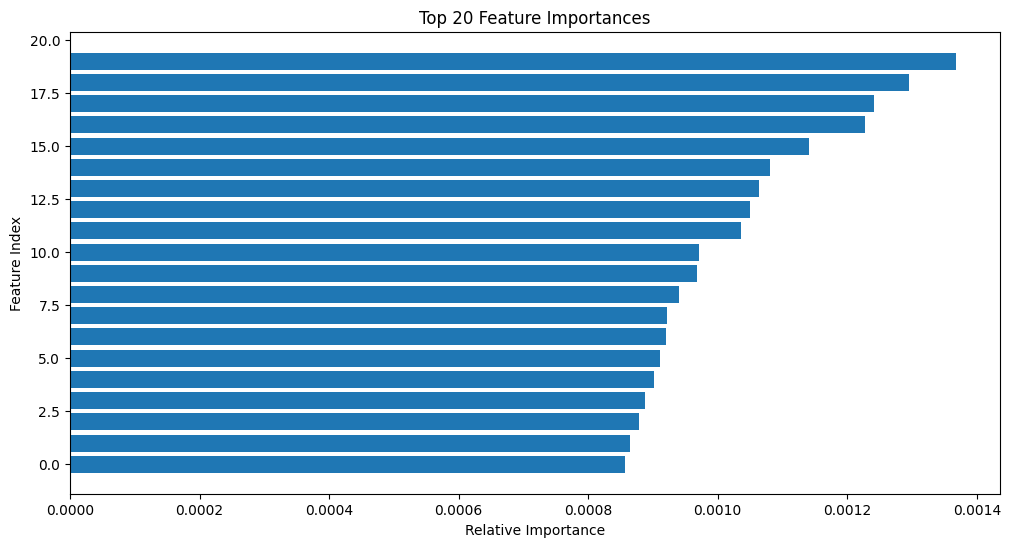

In [16]:
importances = best_rf.feature_importances_

# For visualization purposes, plot top 20 features
indices = np.argsort(importances)[-20:]

plt.figure(figsize=(12,6))
plt.title('Top 20 Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Index')
plt.show()


#Prediction function

In [8]:
def predict_image(image_array):
    import numpy as np
    from tensorflow.image import resize

    # Resize and normalize
    image_resized = resize(image_array, (32,32)).numpy() / 255.0
    image_flat = image_resized.reshape(1, -1)
    prediction = best_rf.predict(image_flat)
    return prediction[0]
